In [0]:
import pandas as pd
import numpy as np

In [0]:
df_inflation = pd.read_csv('IFS_03-14-2020 16-11-47-72_timeSeries.csv')
df_current_us_gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_936013.csv')
df_constant_gdp = pd.read_csv('API_NY.GDP.PCAP.KD_DS2_en_csv_v2_935918.csv')

In [0]:
df_inflation.drop(columns=['Base Year', 'Unnamed: 248'], inplace=True)

## Feature engineering

In [0]:
df_inflation.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)
df_current_us_gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
df_constant_gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

#### Shape of inflation, current US gdp, Constant gdp

In [0]:
df_inflation.shape, df_current_us_gdp.shape, df_constant_gdp.shape

((179, 243), (264, 61), (264, 61))

In [0]:
df_current_us_gdp.head(1)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN


In [0]:
df_constant_gdp.head(1)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15669.61604,18427.61153,22134.017271,24837.950958,25357.786944,26329.313141,26401.96874,26663.20776,27272.310041,26705.180996,26087.775812,27190.501182,27151.924104,26954.404509,28417.384212,26966.054791,25508.302525,25469.287413,27005.529532,26979.885363,27046.223956,27427.578262,27365.930965,24463.692249,23512.602596,24233.001082,23781.257298,24635.764948,24697.494028,24452.606574,24277.406794,24485.083282,NaN,NaN


#### Remove columns prior to 1999

In [0]:
cols_to_remove = []
for col in df_current_us_gdp.columns:
  if col != 'Country Name' and int(col) < 1999:
    cols_to_remove.append(col)

In [0]:
df_current_us_gdp.drop(columns=cols_to_remove, inplace=True)

In [0]:
cols_to_remove = []
for col in df_constant_gdp.columns:
  if col != 'Country Name' and int(col) < 1999:
    cols_to_remove.append(col)

In [0]:
df_constant_gdp.drop(columns=cols_to_remove, inplace=True)

In [0]:
df_current_us_gdp.head(1)

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN


In [0]:
df_constant_gdp.head(1)

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,26954.404509,28417.384212,26966.054791,25508.302525,25469.287413,27005.529532,26979.885363,27046.223956,27427.578262,27365.930965,24463.692249,23512.602596,24233.001082,23781.257298,24635.764948,24697.494028,24452.606574,24277.406794,24485.083282,NaN,NaN


#### Remove rows with no values

In [0]:
Indexes = df_current_us_gdp[df_current_us_gdp.isnull().sum(axis = 1) == len(df_current_us_gdp.columns) - 1].index
len(Indexes)

6

In [0]:
df_current_us_gdp.iloc[Indexes, :]

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
82,Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,"Korea, Dem. People’s Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_current_us_gdp.iloc[Indexes, :]['Country Name'].values

array(['Gibraltar', 'Not classified', 'St. Martin (French part)',
       'Korea, Dem. People’s Rep.', 'Sint Maarten (Dutch part)',
       'British Virgin Islands'], dtype=object)

In [0]:
df_current_us_gdp.drop(Indexes , inplace=True)

In [0]:
df_current_us_gdp.shape

(258, 22)

In [0]:
Indexes = df_constant_gdp[df_constant_gdp.isnull().sum(axis = 1) == len(df_constant_gdp.columns) - 1].index
len(Indexes)

12

In [0]:
df_constant_gdp.iloc[Indexes, :]

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
36,Channel Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,New Caledonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,"Korea, Dem. People’s Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_constant_gdp.iloc[Indexes, :]['Country Name'].values

array(['Channel Islands', 'Curacao', 'Gibraltar', 'Not classified',
       'St. Martin (French part)', 'New Caledonia',
       'Korea, Dem. People’s Rep.', 'French Polynesia', 'Somalia',
       'Sint Maarten (Dutch part)', 'Syrian Arab Republic',
       'British Virgin Islands'], dtype=object)

In [0]:
df_constant_gdp.drop(Indexes , inplace=True)

In [0]:
df_constant_gdp.shape

(252, 22)

In [0]:
df_inflation.set_index('Country Name', inplace=True)
df_constant_gdp.set_index('Country Name', inplace=True)
df_current_us_gdp.set_index('Country Name', inplace=True)

#### Imputing Inflation missing values

In [0]:
bool_nan_values = np.isnan(df_inflation.values)
indices_of_nan_values_inflation = np.argwhere(bool_nan_values == True)
indices_of_nan_values_inflation

array([[  0, 241],
       [  1, 241],
       [  2,   0],
       ...,
       [178, 239],
       [178, 240],
       [178, 241]])

In [0]:
imputed_values_inflation = np.load('brits_i_data_inflation.npy')
imputed_values_inflation

array([[[-3.04376870e-01],
        [-2.17708975e-01],
        [ 1.58898644e-02],
        ...,
        [-2.39741616e-03],
        [-5.91961145e-01],
        [-1.12172149e-01]],

       [[ 3.73853222e-02],
        [ 1.00692827e-02],
        [-2.08433364e-02],
        ...,
        [ 4.97962087e-02],
        [ 6.65249676e-02],
        [ 9.11914110e-02]],

       [[ 1.02912998e+00],
        [ 7.65874207e-01],
        [ 1.33488905e+00],
        ...,
        [-2.08545893e-01],
        [ 1.26261115e-01],
        [ 3.52789722e-02]],

       ...,

       [[-1.55994575e-03],
        [ 3.42885405e-03],
        [-6.79206848e-03],
        ...,
        [-1.49915472e-01],
        [-1.24986544e-01],
        [-9.39147323e-02]],

       [[ 8.64175707e-03],
        [ 6.97245449e-03],
        [ 1.32757053e-03],
        ...,
        [-1.12314187e-01],
        [-8.54979530e-02],
        [-5.39881960e-02]],

       [[ 2.21659482e-01],
        [ 4.83236074e-01],
        [ 6.57515466e-01],
        ...,
        

In [0]:
inflation_mean, inflation_std = df_inflation.stack().mean(), df_inflation.stack().std()

In [0]:
new_df_inflation = df_inflation.copy()
for i in range(len(indices_of_nan_values_inflation)):
  ind = tuple(indices_of_nan_values_inflation[i])
  new_df_inflation.iat[ind] = imputed_values_inflation[ind][0]*inflation_std + inflation_mean

In [0]:
new_df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099,0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530

In [0]:
df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
"Tajikistan, Rep. of",NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0

#### Imputing missing values of current gdp

In [0]:
bool_nan_values = np.isnan(df_current_us_gdp.values)
indices_of_nan_values_current_us_gdp = np.argwhere(bool_nan_values == True)
indices_of_nan_values_current_us_gdp

array([[  0,  19],
       [  0,  20],
       [  1,   0],
       [  1,   1],
       [  1,   2],
       [  1,  20],
       [  2,  20],
       [  3,  20],
       [  4,  20],
       [  5,  20],
       [  6,  20],
       [  7,  20],
       [  8,  20],
       [  9,   0],
       [  9,   1],
       [  9,   2],
       [  9,  20],
       [ 10,  20],
       [ 11,  20],
       [ 12,  20],
       [ 13,  20],
       [ 14,  20],
       [ 15,  20],
       [ 16,  20],
       [ 17,  20],
       [ 18,  20],
       [ 19,  20],
       [ 20,  20],
       [ 21,  20],
       [ 22,  20],
       [ 23,  20],
       [ 24,  20],
       [ 25,  15],
       [ 25,  16],
       [ 25,  17],
       [ 25,  18],
       [ 25,  19],
       [ 25,  20],
       [ 26,  20],
       [ 27,  20],
       [ 28,  20],
       [ 29,  20],
       [ 30,  20],
       [ 31,  20],
       [ 32,  20],
       [ 33,  20],
       [ 34,  20],
       [ 35,  20],
       [ 36,   9],
       [ 36,  10],
       [ 36,  11],
       [ 36,  12],
       [ 36,

In [0]:
imputed_values_current_gdp = np.load('brits_i_data_current_gdp.npy')
imputed_values_current_gdp

array([[[-0.27372855],
        [-0.2737231 ],
        [-0.27372304],
        ...,
        [-0.27363586],
        [-0.27362737],
        [-0.17274384]],

       [[-0.20425066],
        [-0.2423707 ],
        [-0.2488819 ],
        ...,
        [-0.27089533],
        [-0.27101445],
        [-0.17070842]],

       [[-0.09686687],
        [-0.08803041],
        [-0.0855765 ],
        ...,
        [ 0.6636902 ],
        [ 0.68960834],
        [ 0.31504846]],

       ...,

       [[-0.2728976 ],
        [-0.27287215],
        [-0.2729019 ],
        ...,
        [-0.24154028],
        [-0.22415987],
        [-0.14882392]],

       [[-0.24743418],
        [-0.2449686 ],
        [-0.24485712],
        ...,
        [-0.13833414],
        [-0.13094456],
        [-0.0966679 ]],

       [[ 0.55439025],
        [ 0.62650853],
        [ 0.6382264 ],
        ...,
        [ 4.1555176 ],
        [ 4.426034  ],
        [ 2.0608685 ]]], dtype=float32)

In [0]:
current_mean_gdp, current_std_gdp = df_current_us_gdp.stack().mean(), df_current_us_gdp.stack().std()

In [0]:
new_df_current_us_gdp = df_current_us_gdp.copy()
for i in range(len(indices_of_nan_values_current_us_gdp)):
  ind = tuple(indices_of_nan_values_current_us_gdp[i])
  new_df_current_us_gdp.iat[ind] = imputed_values_current_gdp[ind][0]*current_std_gdp + current_mean_gdp

#### Current GDP

In [0]:
df_current_us_gdp.tail()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,NaN,1.849196e+09,2.535334e+09,2.406271e+09,2.790456e+09,3.556757e+09,3.663102e+09,3.846820e+09,4.655899e+09,5.687362e+09,5.653823e+09,5.830416e+09,6.692431e+09,6.499760e+09,7.071982e+09,7.386883e+09,6.440068e+09,6.714727e+09,7.227700e+09,7.938991e+09,NaN
"Yemen, Rep.",7.641103e+09,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041523e+10,4.322859e+10,4.262833e+10,3.096824e+10,2.681870e+10,2.691440e+10,NaN
South Africa,1.366323e+11,1.363613e+11,1.215147e+11,1.154824e+11,1.752569e+11,2.285900e+11,2.577727e+11,2.716385e+11,2.994155e+11,2.867698e+11,2.959365e+11,3.753494e+11,4.164189e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,NaN
Zambia,3.404312e+09,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.124335e+10,2.095475e+10,2.586814e+10,2.672007e+10,NaN
Zimbabwe,6.858013e+09,6.689958e+09,6.777385e+09,6.342116e+09,5.727592e+09,5.805598e+09,5.755215e+09,5.443896e+09,5.291950e+09,4.415703e+09,9.665793e+09,1.204166e+10,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,2.281301e+10,3.100052e+10,NaN


In [0]:
new_df_current_us_gdp.tail()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,9.797693e+10,1.849196e+09,2.535334e+09,2.406271e+09,2.790456e+09,3.556757e+09,3.663102e+09,3.846820e+09,4.655899e+09,5.687362e+09,5.653823e+09,5.830416e+09,6.692431e+09,6.499760e+09,7.071982e+09,7.386883e+09,6.440068e+09,6.714727e+09,7.227700e+09,7.938991e+09,9.920615e+11
"Yemen, Rep.",7.641103e+09,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041523e+10,4.322859e+10,4.262833e+10,3.096824e+10,2.681870e+10,2.691440e+10,7.064758e+11
South Africa,1.366323e+11,1.363613e+11,1.215147e+11,1.154824e+11,1.752569e+11,2.285900e+11,2.577727e+11,2.716385e+11,2.994155e+11,2.867698e+11,2.959365e+11,3.753494e+11,4.164189e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,8.693979e+11
Zambia,3.404312e+09,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.124335e+10,2.095475e+10,2.586814e+10,2.672007e+10,1.232228e+12
Zimbabwe,6.858013e+09,6.689958e+09,6.777385e+09,6.342116e+09,5.727592e+09,5.805598e+09,5.755215e+09,5.443896e+09,5.291950e+09,4.415703e+09,9.665793e+09,1.204166e+10,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,2.281301e+10,3.100052e+10,1.624142e+13


#### Imputing Constant US GDP value

In [0]:
bool_nan_values = np.isnan(df_constant_gdp.values)
indices_of_nan_values_constant_gdp = np.argwhere(bool_nan_values == True)
indices_of_nan_values_constant_gdp

array([[  0,  19],
       [  0,  20],
       [  1,   0],
       [  1,   1],
       [  1,   2],
       [  1,  20],
       [  2,  20],
       [  3,  20],
       [  4,  20],
       [  5,  20],
       [  6,  20],
       [  7,  20],
       [  8,  20],
       [  9,   0],
       [  9,   1],
       [  9,   2],
       [  9,  20],
       [ 10,  20],
       [ 11,  20],
       [ 12,  20],
       [ 13,  20],
       [ 14,  20],
       [ 15,  20],
       [ 16,  20],
       [ 17,  20],
       [ 18,  20],
       [ 19,  20],
       [ 20,  20],
       [ 21,  20],
       [ 22,  20],
       [ 23,  20],
       [ 24,  20],
       [ 25,  15],
       [ 25,  16],
       [ 25,  17],
       [ 25,  18],
       [ 25,  19],
       [ 25,  20],
       [ 26,  20],
       [ 27,  20],
       [ 28,  20],
       [ 29,  20],
       [ 30,  20],
       [ 31,  20],
       [ 32,  20],
       [ 33,  20],
       [ 34,  20],
       [ 35,  20],
       [ 36,  20],
       [ 37,  20],
       [ 38,  20],
       [ 39,  20],
       [ 40,

In [0]:
imputed_values_constant_gdp = np.load('brits_i_data_constant_gdp.npy')
imputed_values_constant_gdp

array([[[ 2.8716304 ],
        [ 3.166852  ],
        [ 3.3994777 ],
        ...,
        [ 1.1183068 ],
        [ 1.0476329 ],
        [ 1.0203525 ]],

       [[-0.63458335],
        [-0.6333263 ],
        [-0.6319701 ],
        ...,
        [-0.61339676],
        [-0.6125904 ],
        [-0.3218972 ]],

       [[-0.28514007],
        [-0.27367467],
        [-0.2711588 ],
        ...,
        [-0.15281947],
        [-0.14297883],
        [-0.08841898]],

       ...,

       [[-0.6117197 ],
        [-0.61130315],
        [-0.6101841 ],
        ...,
        [-0.5933261 ],
        [-0.5905887 ],
        [-0.3104533 ]],

       [[-0.2976054 ],
        [-0.5349736 ],
        [-0.5318792 ],
        ...,
        [-0.5328588 ],
        [-0.5339647 ],
        [-0.28211904]],

       [[-0.4398896 ],
        [-0.43257266],
        [-0.4338718 ],
        ...,
        [-0.35598263],
        [-0.27199754],
        [-0.18503124]]], dtype=float32)

In [0]:
const_mean_gdp, const_std_gdp = df_constant_gdp.stack().mean(), df_constant_gdp.stack().std()

In [0]:
new_df_constant_gdp = df_constant_gdp.copy()
for i in range(len(indices_of_nan_values_constant_gdp)):
  ind = tuple(indices_of_nan_values_constant_gdp[i])
  new_df_constant_gdp.iat[ind] = imputed_values_constant_gdp[ind][0] * const_std_gdp + const_mean_gdp

In [0]:
df_constant_gdp.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,26954.404509,28417.384212,26966.054791,25508.302525,25469.287413,27005.529532,26979.885363,27046.223956,27427.578262,27365.930965,24463.692249,23512.602596,24233.001082,23781.257298,24635.764948,24697.494028,24452.606574,24277.406794,24485.083282,NaN,NaN
Afghanistan,NaN,NaN,NaN,330.303553,343.080890,333.216684,357.234720,365.284495,405.548979,412.014287,488.300251,543.303042,528.736648,576.190125,587.565090,583.656193,574.184114,571.073775,571.542506,563.825663,NaN
Angola,2201.529460,2195.630582,2213.681162,2433.804393,2423.293995,2597.456995,2883.978211,3102.650928,3409.503462,3652.153498,3549.577857,3587.883798,3579.960081,3748.449445,3796.882622,3843.198241,3748.320623,3530.309423,3409.929285,3229.619740,NaN
Albania,2085.432000,2244.631092,2453.631476,2572.728837,2725.179233,2887.378653,3062.682698,3263.911108,3485.332441,3775.592182,3928.461732,4094.362119,4209.886951,4276.620180,4327.392449,4413.309627,4524.386108,4681.840039,4865.209546,5079.401120,NaN
Andorra,40035.482449,40801.542130,41420.846178,42396.302398,45519.492384,47032.866888,48831.929360,49707.173015,48710.075502,43900.428212,41979.368881,39736.354063,38207.595907,38192.439890,39111.079528,40790.198011,41767.526508,42949.666237,43858.077514,44569.783009,NaN


In [0]:
new_df_constant_gdp.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,26954.404509,28417.384212,26966.054791,25508.302525,25469.287413,27005.529532,26979.885363,27046.223956,27427.578262,27365.930965,24463.692249,23512.602596,24233.001082,23781.257298,24635.764948,24697.494028,24452.606574,24277.406794,24485.083282,35746.687080,35177.169537
Afghanistan,628.069479,654.312405,682.624653,330.303553,343.080890,333.216684,357.234720,365.284495,405.548979,412.014287,488.300251,543.303042,528.736648,576.190125,587.565090,583.656193,574.184114,571.073775,571.542506,563.825663,7155.830061
Angola,2201.529460,2195.630582,2213.681162,2433.804393,2423.293995,2597.456995,2883.978211,3102.650928,3409.503462,3652.153498,3549.577857,3587.883798,3579.960081,3748.449445,3796.882622,3843.198241,3748.320623,3530.309423,3409.929285,3229.619740,12030.014704
Albania,2085.432000,2244.631092,2453.631476,2572.728837,2725.179233,2887.378653,3062.682698,3263.911108,3485.332441,3775.592182,3928.461732,4094.362119,4209.886951,4276.620180,4327.392449,4413.309627,4524.386108,4681.840039,4865.209546,5079.401120,7813.558180
Andorra,40035.482449,40801.542130,41420.846178,42396.302398,45519.492384,47032.866888,48831.929360,49707.173015,48710.075502,43900.428212,41979.368881,39736.354063,38207.595907,38192.439890,39111.079528,40790.198011,41767.526508,42949.666237,43858.077514,44569.783009,13827.250833


In [0]:
len(new_df_current_us_gdp.index)

258

#### So, there is no country in constant gdp which is not included in currrent us gdp

In [0]:
for col in new_df_constant_gdp.index:
  if not col in new_df_current_us_gdp.index:
    print('col is:', col)

#### Remove indices which are not in constant gdp

In [0]:
remove_ind = []
for ind in new_df_current_us_gdp.index:
  if not ind in new_df_constant_gdp.index:
    remove_ind.append(ind)
    print('col is:', ind)

col is: Channel Islands
col is: Curacao
col is: New Caledonia
col is: French Polynesia
col is: Somalia
col is: Syrian Arab Republic


#### Take the last two years as Test Set, others as Train Set

In [0]:
new_df_inflation.head()
col_list = new_df_inflation.columns

train_columns = col_list[:-24]
test_columns = col_list[len(col_list) - 24:]

test_data_inflation = new_df_inflation[[c for c in new_df_inflation.columns if c in test_columns]]
train_data_inflation = new_df_inflation[[c for c in new_df_inflation.columns if c in train_columns]]

In [0]:
train_data_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,-0.303337,0.405680,0.303030,1.208459,-0.597015,-0.200200,-0.200602,0.000000,0.402010,0.500501,0.099602,-0.398010,0.000000,0.499500,0.497018,1.582591,-0.486855,-0.195695,-0.392157,-0.196850,0.197239,0.098425,0.688299,-0.097656,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.618413,0.623269,2.360000,1.651036,0.826526,0.896006,0.651866,0.722733,0.214332,0.223173,1.326777,0.833257,0.481293,1.201988,1.860000,2.905949,0.829994,0.709622,0.488538,0.392670,0.353883,-0.148478,0.669145,0.803176,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.700000,0.500000,0.600000,0.110000,0.800000,0.690000,0.310000,0.077581,0.100000,0.500000,0.400000,0.457796,0.600000,0.400000,1.400000,0.494753,0.200000,0.414642,0.200000,0.300000,0.600000,0.800000,0.400000,0.200000,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,0.094046,0.532286,0.179856,3.992646,0.923362,-0.211996,-0.573771,-1.140382,-0.727607,-0.112804,0.299207,0.137869,0.389447,4.353287,5.799241,0.444696,0.411886,0.189708,-0.121102,-0.465617,-0.291006,0.521861,2.269735,1.343014,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.85

In [0]:
test_data_inflation.head()

,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-2.096000e-01,0.309700,0.493000,-0.092200,0.181600,0.280100,0.315300,0.585100,0.962600,1.399000,1.232800,-0.167000


In [0]:
new_df_current_us_gdp.drop(remove_ind , inplace=True)

In [0]:
import calendar
res_lst = []
new_set = set()

for ind, ls in train_data_inflation.iterrows():
  for i in range(len(ls)-12):
    values = ls[i:i+13].values.tolist()
    month_col = ls[i+12:i+13].index[0]
    str_month = calendar.month_name[int(month_col[month_col.find('M') + 1:])]
    year = month_col[:month_col.find('M')]
    if ind in new_df_current_us_gdp.index:
      values.append(str_month)
      values.append(new_df_current_us_gdp.at[ind, str(int(year) - 1)])
      values.append(new_df_constant_gdp.at[ind, str(int(year) - 1)])
      res_lst.append(values)
    elif ',' in ind and ind.split(',')[0].strip() in new_df_current_us_gdp.index:
      test = ind.split(',')[0].strip()
      res = [i for i in new_df_current_us_gdp.index if test in i][0]
      values.append(str_month)
      values.append(new_df_current_us_gdp.at[res, str(int(year) - 1)])
      values.append(new_df_constant_gdp.at[res, str(int(year) - 1)])
      res_lst.append(values)
    else:
      new_set.add(ind)

In [0]:
new_set

{'Central African Rep.',
 'Congo, Dem. Rep. of the',
 'Congo, Rep. of',
 'Curaçao, Kingdom of the Netherlands',
 'Czech Rep.',
 "Côte d'Ivoire",
 'Dominican Rep.',
 'Egypt, Arab Rep. of',
 'Iran, Islamic Rep. of',
 'Korea, Rep. of',
 'Kyrgyz Rep.',
 "Lao People's Dem. Rep.",
 'Montserrat',
 'New Caledonia',
 'Sint Maarten, Kingdom of the Netherlands',
 'Slovak Rep.',
 'Syrian Arab Rep.',
 'São Tomé and Príncipe, Dem. Rep. of',
 'Venezuela, Rep. Bolivariana de',
 'Yemen, Rep. of'}

In [0]:
len(new_set)

20

In [0]:
df_ = pd.DataFrame(res_lst, columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'target', 'month', 'current us gdp', 'constant us gdp'])

In [0]:
df_[df_.isnull().sum(axis=1) > 0].shape

(0, 16)

In [0]:
df_.shape

(32754, 16)

In [0]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month,current us gdp,constant us gdp
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,January,1.211347e+12,1767.833627
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,February,1.211347e+12,1767.833627
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,March,1.211347e+12,1767.833627
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,April,1.211347e+12,1767.833627
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,May,1.211347e+12,1767.833627


In [0]:
res_df = df_.copy()

## Light GBM Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [0]:
res_df['month'] = res_df['month'].astype('category')
encoder = LabelEncoder()
res_df['month'] = encoder.fit_transform(res_df['month'])
res_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month,current us gdp,constant us gdp
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,4,1.211347e+12,1767.833627
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,3,1.211347e+12,1767.833627
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,7,1.211347e+12,1767.833627
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,0,1.211347e+12,1767.833627
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,8,1.211347e+12,1767.833627


In [0]:
X = res_df.drop(columns=['target'])
y = res_df.loc[:, 'target']

In [0]:
for c in X.columns:
    col_type = X[c].dtype
    if c == 'month':
      X[c] = X[c].astype('category')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import lightgbm as lgb
dtrain = lgb.Dataset(data=X_train, label=y_train, categorical_feature=['month'])

def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        global dtrain    
        params = {'application':'regression','num_iterations': 5000,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'l2'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, dtrain, nfold=5, seed=42, categorical_feature=['month'], stratified=False, verbose_eval =None, metrics=['l2'])
        return -np.min(cv_result['l2-mean'])

# Domain space-- Range of hyperparameters
pds = {'num_leaves': (20, 90),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (9, 13 ),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (30, 50)
          }

!pip3 install bayesian-optimization

from bayes_opt import BayesianOptimization
# Surrogate model
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=35)

optimizer.max['params']

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        | -1.329    |  0.8153   |  0.7239   |  10.75    |  44.47    |  0.09782  |  57.69    |
|  2        | -1.366    |  0.9002   |  0.1576   |  10.07    |  40.0     |  0.06824  |  76.26    |
|  3        | -1.36     |  0.8762   |  0.1527   |  10.15    |  48.19    |  0.02213  |  51.65    |
|  4        | -1.417    |  0.9862   |  0.1199   |  11.4     |  49.0     |  0.0238   |  58.39    |
|  5        | -1.351    |  0.9818   |  0.2065   |  11.09    |  45.01    |  0.06723  |  52.74    |
|  6        | -1.363    |  0.8      |  0.9      |  9.0      |  30.0     |  0.1      |  20.0     |
|  7        | -1.351    |  0.8      |  0.9      |  9.0      |  30.0     |  0.001    |  59.23    |
|  8        | -1.333    |  0.8      |  0.9      |  9.0      |  50.0     |  0.1      |  20.0     |
|  9        | -1.332

{'bagging_fraction': 0.8449747032569521,
 'feature_fraction': 0.740923311710956,
 'max_depth': 9.189594762667438,
 'min_child_weight': 49.866179171566735,
 'min_split_gain': 0.09909881467589517,
 'num_leaves': 40.50554015242693}

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lgb_train = lgb.Dataset(data=X_train, label=y_train, categorical_feature=['month'])
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=['month'])

# specify your configurations as a dict
params = {'bagging_fraction': 0.8449747032569521,
 'feature_fraction': 0.740923311710956,
 'max_depth': 9,
 'min_child_weight': 49.866179171566735,
 'min_split_gain': 0.09909881467589517,
 'num_leaves': 40}

print('Starting training...')
# train
gbm = lgb.train(params, lgb_train)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict

print('x test shape is:')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Starting training...
Saving model...
Starting predicting...
x test shape is:
MAE: 0.5465090316258325
MSE: 1.3084635766010968
RMSE: 1.1438809276323725


#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
print('MAE:', mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.5491501419193148
MSE: 1.4436971230516806
RMSE: 1.201539480438192


#### Hyperparameter Tuning with Random Forest

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [1000] #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 41, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 15, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 41, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [5, 10, 15, 20],
 'min_samples_split': [5, 10, 15, 20],
 'n_estimators': [1000]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, random_state=42)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
from pprint import pprint
pprint(rf_random.best_estimator_.get_params())
predictions = rf_random.best_estimator_.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 31,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
MAE: 0.5350611933748878
MSE: 1.3171132221082982
RMSE: 1.1476555328617983


In [0]:
rf_random = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse', max_depth=31, 
                                  max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0,
                                  min_impurity_split=None, min_samples_leaf=5, min_samples_split=5,
                                  min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None, oob_score=False,
                                  random_state=42, verbose=0, warm_start=False)
rf_random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=31, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
predictions = rf_random.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.5350866241106624
MSE: 1.3223470279480485
RMSE: 1.149933488488812


In [0]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from pprint import pprint
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# # rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, verbose=1, param_distributions = random_grid, n_iter = 100, cv = 3, n_jobs=None, random_state=42)
# rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
# from pprint import pprint
# pprint(rf_random.best_estimator_.get_params())
# predictions = rf_random.best_estimator_.predict(X_test)
# print('MAE:', mean_absolute_error(y_test, predictions))
# print('MSE:', mean_squared_error(y_test, predictions))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

### CatBoost model

In [0]:
!pip3 install catboost

import catboost as cgb
dtrain = lgb.Dataset(X_train, y_train, categorical_feature=['month'])

def cat_hyp(depth, bagging_temperature): # Function to optimize depth and bagging temperature
  params = {"iterations": 100,
            "learning_rate": 0.05,
            "eval_metric": "RMSE"
            } # Default Parameters
  params[ "depth"] = int(round(depth)) 
  params["bagging_temperature"] = bagging_temperature
  
  cv_dataset = cgb.Pool(data=X,
                  label=y,
                  cat_features=['month'])

  scores = cgb.cv(cv_dataset,
              params,
              fold_count=3)
  # print('scores are:', scores)
  return -np.min(scores['test-RMSE-mean'])  # Return maximum R-Squared value   

# Domain space-- Range of hyperparameters
# Search space
pds = {'depth': (3, 12), 'bagging_temperature': (3,10)}

#!pip3 install bayesian-optimization

from bayes_opt import BayesianOptimization
# Surrogate model
optimizer = BayesianOptimization(cat_hyp, pds, random_state=7)

# Optimize
optimizer.maximize(init_points=5, n_iter=10)

optimizer.max['params']

     |████████████████████████████████| 64.8MB 49kB/s 
|   iter    |  target   | baggin... |   depth   |
-------------------------------------------------
0:	learn: 1.3406634	test: 1.3439054	best: 1.3439054 (0)	total: 268ms	remaining: 26.5s
1:	learn: 1.3230271	test: 1.3322636	best: 1.3322636 (1)	total: 469ms	remaining: 23s
2:	learn: 1.3062299	test: 1.3215605	best: 1.3215605 (2)	total: 685ms	remaining: 22.1s
3:	learn: 1.2901372	test: 1.3117165	best: 1.3117165 (3)	total: 879ms	remaining: 21.1s
4:	learn: 1.2751867	test: 1.3030297	best: 1.3030297 (4)	total: 1.08s	remaining: 20.6s
5:	learn: 1.2609574	test: 1.2952262	best: 1.2952262 (5)	total: 1.27s	remaining: 20s
6:	learn: 1.2475109	test: 1.2873425	best: 1.2873425 (6)	total: 1.48s	remaining: 19.6s
7:	learn: 1.2343405	test: 1.2797333	best: 1.2797333 (7)	total: 1.67s	remaining: 19.2s
8:	learn: 1.2218407	test: 1.2727908	best: 1.2727908 (8)	total: 1.87s	remaining: 18.9s
9:	learn: 1.2093597	test: 1.2662911	best: 1.2662911 (9)	total: 2.07s	remain

{'bagging_temperature': 9.845926583976219, 'depth': 7.846462833693903}

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

cb_model = cgb.CatBoostRegressor(iterations = 100, learning_rate = 0.05, depth= 7, bagging_temperature =  9.845926583976219)

cb_model.fit(X_train, y_train, cat_features=['month'])
# predict
y_pred = cb_model.predict(X_test)
# eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

0:	learn: 1.2882132	total: 14.6ms	remaining: 1.45s
1:	learn: 1.2761308	total: 27.6ms	remaining: 1.35s
2:	learn: 1.2641273	total: 39.9ms	remaining: 1.29s
3:	learn: 1.2531909	total: 52.5ms	remaining: 1.26s
4:	learn: 1.2424842	total: 65.5ms	remaining: 1.24s
5:	learn: 1.2325858	total: 83.7ms	remaining: 1.31s
6:	learn: 1.2233618	total: 104ms	remaining: 1.38s
7:	learn: 1.2140268	total: 128ms	remaining: 1.48s
8:	learn: 1.2049260	total: 141ms	remaining: 1.42s
9:	learn: 1.1964622	total: 153ms	remaining: 1.37s
10:	learn: 1.1875200	total: 172ms	remaining: 1.39s
11:	learn: 1.1804673	total: 184ms	remaining: 1.35s
12:	learn: 1.1730393	total: 196ms	remaining: 1.31s
13:	learn: 1.1658998	total: 209ms	remaining: 1.28s
14:	learn: 1.1583583	total: 228ms	remaining: 1.29s
15:	learn: 1.1513589	total: 240ms	remaining: 1.26s
16:	learn: 1.1449698	total: 252ms	remaining: 1.23s
17:	learn: 1.1380618	total: 265ms	remaining: 1.21s
18:	learn: 1.1324814	total: 277ms	remaining: 1.18s
19:	learn: 1.1267230	total: 289ms	r

#### XGBoost Model

In [0]:
# encoder = LabelEncoder()
X_train['month'] = encoder.fit_transform(X_train['month'])
X_train.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'month', 'current us gdp',
       'constant us gdp'], dtype=object)

In [0]:
X_train['month']

15171    3
20355    2
11793    0
1418     7
1311     0
        ..
29802    5
5390     9
860      4
15795    1
23654    7
Name: month, Length: 26203, dtype: int64

In [0]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)

# Define Objective Function
def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight, gamma ):
    params = {
    'n_estimators': 300,
    'eta': 0.05,
    'objective': 'reg:linear',
    'eval_metric':'rmse', # Optional --> Use eval_metric if you want to stop evaluation based on eval_metric 
    'silent': 1
     }
    params['max_depth'] = int(round(max_depth))
    params['subsample'] = max(min(subsample, 1), 0)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['min_child_weight'] = int(min_child_weight)
    params['gamma'] = max(gamma, 0)
    scores = xgb.cv(params, dtrain, num_boost_round=1000, verbose_eval=False, early_stopping_rounds=10, maximize=True, nfold=5)
    return  scores['test-rmse-mean'].iloc[-1]


pds = {
  'min_child_weight':(14, 20),
  'gamma':(0, 5),
  'subsample':(0.5, 1),
  'colsample_bytree':(0.1, 1),
  'max_depth': (5, 10)
}

# Surrogate model
optimizer = BayesianOptimization(hyp_xgb, pds, random_state=10)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
|  1        |  1.281    |  0.7942   |  0.1038   |  8.168    |  18.49    |  0.7493   |
|  2        |  1.282    |  0.3023   |  0.9903   |  8.803    |  15.01    |  0.5442   |
|  3        |  1.282    |  0.7168   |  4.767    |  5.02     |  17.07    |  0.9063   |
|  4        |  1.281    |  0.6513   |  3.609    |  6.459    |  19.51    |  0.8573   |
|  5        |  1.28     |  0.5883   |  0.7109   |  6.867    |  18.04    |  0.7209   |
|  6        |  1.282    |  0.3969   |  4.887    |  9.716    |  14.03    |  0.7395   |
|  7        |  1.281    |  0.4795   |  4.782    |  5.072    |  14.04    |  0.6023   |
|  8        |  1.28     |  0.4688   |  4.897    |  9.77     |  14.08    |  0.6363   |
|  9        |  1.284    |  0.3612   |  0.1162   |  5.017    |  19.9     |  0.675    |
|  10       |  1.282    |  0.6771   |  0.3129   |  5.2

In [0]:
optimizer.max['params']

{'colsample_bytree': 0.11290694003527754,
 'gamma': 4.714730466139085,
 'max_depth': 5.193793865488396,
 'min_child_weight': 19.53670368153479,
 'subsample': 0.5464387772578636}

In [0]:
X_test['month'] = encoder.fit_transform(X_test['month'])

In [0]:
xgb_model = xgb.XGBRFRegressor(params=optimizer.max['params'])

xgb_model.fit(X_train.values, y_train.values)

# predict
y_pred = xgb_model.predict(X_test.values)
# eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[18:15:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.5794065222562255
MSE: 1.4815723147572242
RMSE: 1.217198551904012


### ARIMA model

In [0]:
train_df_armenia = train_data_inflation[train_data_inflation.index.str.contains('Armenia')]

test_df_armenia = test_data_inflation[test_data_inflation.index.str.contains('Armenia')]
train_df_armenia

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Armenia, Rep. of",1.882147,0.120668,-0.39357,-0.812643,-0.316162,-0.294022,-1.970415,-1.28604,0.258496,-0.013654,0.883242,2.409684,4.624233,-0.936777,0.016011,-0.090948,1.614929,-1.333605,-2.705763,-0.688128,-1.174225,0.086103,1.206852,2.420329,2.219259,-0.725348,-0.617413,2.530108,1.695025,-0.517488,-4.952707,-3.032013,-0.635878,0.510183,2.229309,3.582454,4.132248,-1.540265,-0.45123,2.046984,...,1.322465,3.025364,2.461525,-0.054104,-0.072663,-0.430662,-0.480486,-1.413583,-2.151702,0.08607,0.130956,-0.410584,0.622431,1.665628,2.189354,-1.400459,-0.333295,-0.320258,-0.668891,-0.463351,-2.343199,-0.471596,0.143413,0.541575,0.972613,1.149876,2.602985,-0.880643,-0.309745,0.980565,-0.246264,-0.947245,-2.575306,-0.394277,0.150221,0.798093,1.978092,1.537581,2.844461,-0.475751


In [0]:
train_df_armenia

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Armenia, Rep. of",1.882147,0.120668,-0.39357,-0.812643,-0.316162,-0.294022,-1.970415,-1.28604,0.258496,-0.013654,0.883242,2.409684,4.624233,-0.936777,0.016011,-0.090948,1.614929,-1.333605,-2.705763,-0.688128,-1.174225,0.086103,1.206852,2.420329,2.219259,-0.725348,-0.617413,2.530108,1.695025,-0.517488,-4.952707,-3.032013,-0.635878,0.510183,2.229309,3.582454,4.132248,-1.540265,-0.45123,2.046984,...,1.322465,3.025364,2.461525,-0.054104,-0.072663,-0.430662,-0.480486,-1.413583,-2.151702,0.08607,0.130956,-0.410584,0.622431,1.665628,2.189354,-1.400459,-0.333295,-0.320258,-0.668891,-0.463351,-2.343199,-0.471596,0.143413,0.541575,0.972613,1.149876,2.602985,-0.880643,-0.309745,0.980565,-0.246264,-0.947245,-2.575306,-0.394277,0.150221,0.798093,1.978092,1.537581,2.844461,-0.475751


In [0]:
!pip3 install pyramid-arima

from pyramid.arima import auto_arima
arima_model = auto_arima(train_df_armenia.values[0], trace=True, error_action='ignore', suppress_warnings=True)
arima_model.fit(train_df_armenia.values[0])

arima_model_predicted = arima_model.predict(n_periods=len(test_df_armenia.values[0]))

rms = sqrt(mean_squared_error(test_df_armenia.values[0], arima_model_predicted))
print('RMSE:', rms)
mse = mean_squared_error(test_df_armenia.values[0], arima_model_predicted)
print('MSE:', mse)
mae = mean_absolute_error(test_df_armenia.values[0], arima_model_predicted)
print('MAE:', mae)


#forecast = pd.DataFrame(forecast,index = test_df_armenia.values[0],columns=['Prediction'])

#plot the predictions for validation set

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# plt.plot(train_df_armenia.values[0], label='Train')
# plt.plot(test_df_armenia.values[0], label='Test')
# plt.plot(forecast, label='Prediction')
# plt.xlabel('Index')
# plt.ylabel('Inflation')
# plt.title('ARIMA model for inflation of Armenia')
# plt.legend()
# plt.show()

     |████████████████████████████████| 604kB 4.7MB/s 
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=779.928, BIC=800.235, Fit time=0.411 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=841.750, BIC=848.519, Fit time=0.011 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=804.015, BIC=814.169, Fit time=0.030 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=793.804, BIC=803.957, Fit time=0.037 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=797.695, BIC=814.617, Fit time=0.178 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=778.784, BIC=802.475, Fit time=0.256 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=797.028, BIC=817.335, Fit time=0.293 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=736.920, BIC=763.996, Fit time=0.697 seconds
Fit ARIMA: order=(4, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=743.346, BIC=777.191, Fit time=0.850 seconds


### Random Walk

#### Fast AI model (neural nets)

In [0]:
!pip3 install fastai

In [0]:
from fastai.tabular import *

In [0]:
train_data = X_train.copy()
train_data['target'] = y_train

test_data = X_test.copy()
test_data['target'] = y_test
# pd.concat([X_train, y_train])
# test_data = pd.concat([X_test, y_test])
# train_data = res_df[:int(0.8*(len(res_df)))]
# test_data = res_df[int(0.8*(len(res_df))):]
# .sample(n=3)

In [0]:
train_data.columns

Index([                0,                 1,                 2,
                       3,                 4,                 5,
                       6,                 7,                 8,
                       9,                10,                11,
                 'month',  'current us gdp', 'constant us gdp',
                'target'],
      dtype='object')

In [0]:
path = ''

#The dependent variable/target
dep_var = 'target'

#The list of categorical features in the dataset
cat_names = ['month'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'current us gdp', 'constant us gdp'] 

#List of Processes/transforms to be applied to the dataset
procs = [Categorify, Normalize]

#Start index for creating a validation set from train_data
start_indx = len(train_data) - int(len(train_data) * 0.2)

#End index for creating a validation set from train_data
end_indx = len(train_data)

#TabularList for Validation
val = (TabularList.from_df(train_data.iloc[start_indx:end_indx].copy(), path=path, cat_names=cat_names, cont_names=cont_names))

test = (TabularList.from_df(test_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))

#TabularList for training
data = (TabularList.from_df(train_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(start_indx,end_indx)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [0]:
data.show_batch(rows = 10)

month,0,1,2,3,4,5,6,7,8,9,10,11,current us gdp,constant us gdp,target
9,0.5296,1.2347,0.2580,0.3261,0.4850,0.4790,0.5019,0.4632,0.5213,0.5001,1.4019,0.5931,-0.2172,-0.5122,1.0078857
0,-0.0177,-0.4138,-0.6567,0.1633,-0.2309,-0.0049,0.1329,-0.6644,-0.4087,-0.2959,0.2619,0.4721,0.2760,1.9994,0.09129641
3,-0.7019,-0.1451,0.0878,-0.2633,-0.2796,-0.1872,0.1047,-0.1472,-0.0888,0.0412,-0.1783,-0.7110,-0.2618,-0.5699,2.5516403
6,0.7161,-0.4155,-0.1002,-0.4480,-0.6695,2.7875,0.9306,-0.6067,-0.1120,0.0018,0.3303,-0.2228,-0.2618,0.1238,-0.4537037
10,0.7199,-0.0808,-0.3009,-1.4479,-0.0175,0.6628,0.3637,-0.0511,-0.7886,-1.0906,0.0834,0.1516,-0.2446,0.9137,0.6761269
3,0.0538,-0.3169,-0.0925,-0.4202,-0.2661,-0.5603,-0.1282,-0.1764,-0.3254,-0.1323,-0.3395,-0.5285,-0.0990,1.8533,0.30629385
9,-0.4972,-0.6427,-0.6575,-0.9592,1.2108,-0.0952,-0.1445,-0.3937,-0.8468,-0.8427,1.0694,0.0588,-0.0349,0.8877,0.4978795
10,-0.1983,-0.1705,-0.3919,-0.5614,-0.0846,-0.1659,-0.0648,-0.1806,-0.0414,0.0590,-0.2621,-0.3358,-0.2246,-0.5410,0.50004166
9,1.7025,1.4532,2.3461,1.2869,1.2446,1.7661,1.0482,0.9097,0.6490,1.3025,1.1095,1.4855,-0.2384,-0.4405,2.7349577
5,-0.2929,-0.2337,-0.1285,-0.1258,-0.1184,0.0735,0.2037,0.0975,-0.0656,0.2825,-0.0586,-0.2821,-0.2177,-0.4545,0.17582189


In [0]:
#Initializing the network
learn = tabular_learner(data, layers=[300,200, 100, 50], metrics= [rmse, mse, mae])

In [0]:
#Show the complete Summary of the model
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (20963 items)
x: TabularList
month 3; 0 -1.3293; 1 0.0983; 2 0.3028; 3 -0.4836; 4 0.3377; 5 -0.6891; 6 -0.6264; 7 -0.6961; 8 -1.1352; 9 0.2264; 10 0.7779; 11 0.4142; current us gdp -0.2598; constant us gdp -0.6715; ,month 2; 0 0.3141; 1 0.2350; 2 0.0219; 3 -0.1119; 4 -0.0004; 5 -0.0936; 6 -0.0546; 7 -0.0528; 8 -0.0890; 9 0.0363; 10 0.0336; 11 0.1003; current us gdp -0.2543; constant us gdp -0.6762; ,month 0; 0 -0.5931; 1 -0.3821; 2 -0.3857; 3 0.1271; 4 -0.3271; 5 -0.4929; 6 -0.1721; 7 -0.1811; 8 -0.3110; 9 -0.3836; 10 -0.3842; 11 -0.3114; current us gdp -0.0963; constant us gdp 0.3042; ,month 7; 0 -0.2354; 1 -0.0946; 2 -0.1693; 3 -0.3074; 4 -0.4041; 5 -0.0961; 6 -0.4097; 7 -0.2615; 8 -0.3110; 9 -0.2387; 10 -0.6739; 11 -0.1642; current us gdp 1.6167; constant us gdp 1.5330; ,month 0; 0 0.1347; 1 0.0435; 2 -0.1364; 3 -0.3074; 4 -0.0433; 5 -0.2367; 6 -0.2350; 7 -0.1478; 8 0.0435; 9 -0.7488; 10 -0.0443; 11 0.04

epoch,train_loss,valid_loss,root_mean_squared_error,mean_squared_error,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


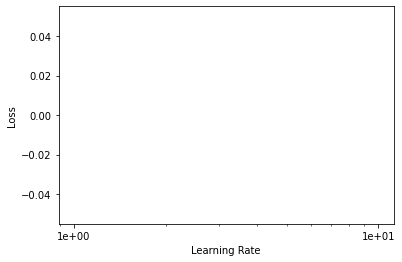

In [0]:
#Exploring the learning rates
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
learn.recorder.plot()

In [0]:
#Fitting data and training the network
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,root_mean_squared_error,mean_squared_error,mean_absolute_error,time
0,1.698962,1.097601,0.962566,1.097601,0.569077,00:03
1,1.960934,1.089329,0.963485,1.089329,0.580462,00:03
2,2.388302,1.148235,0.987143,1.148235,0.567734,00:03
3,1.042768,1.063940,0.947557,1.063940,0.553856,00:03
4,1.295364,1.117936,0.974132,1.117936,0.568237,00:03
5,0.930708,1.115444,0.965302,1.115444,0.560576,00:03
6,1.526007,1.227039,1.005900,1.227039,0.574347,00:03
7,1.013937,1.232497,0.997619,1.232497,0.558173,00:03
8,0.832472,1.485417,1.064232,1.485417,0.579847,00:03
9,1.575641,3.979042,1.609534,3.979043,0.700591,00:03


In [0]:
#Display Predictions On Training Data
learn.show_results(ds_type=DatasetType.Train, rows = 5)
#Display Predictions On Validation Data
learn.show_results(ds_type=DatasetType.Valid)

month,0,1,2,3,4,5,6,7,8,9,10,11,current us gdp,constant us gdp,target,prediction
8,-0.1354,-0.0634,-0.2660,-0.0582,-0.2643,0.0702,0.8768,0.3478,0.3190,0.3852,-0.0616,-0.0459,-0.2488,-0.6131,0.07198684,[0.325747]
6,0.0531,-0.0906,-0.0361,0.5157,0.7712,0.2591,0.1080,0.6803,0.4201,-0.2455,0.4132,0.4110,-0.2570,-0.3233,0.3539823,[0.510297]
7,0.0682,0.5661,0.7425,0.7883,0.2750,-0.0826,0.1881,0.1684,-0.0604,0.0242,0.3774,-0.5086,-0.2570,1.3417,0.40388283,[0.265997]
0,-0.8458,0.1832,0.7214,1.4559,0.0720,0.4597,2.8819,0.2669,1.2957,1.8418,1.2593,0.9777,-0.2614,-0.6889,4.3351297,[1.286975]
11,0.0739,-0.7172,-0.5254,0.0305,-0.5016,0.3082,0.1539,-0.6283,0.4469,-0.7295,-0.3971,0.2184,-0.2560,-0.5390,0.26473182,[0.280881]


month,0,1,2,3,4,5,6,7,8,9,10,11,current us gdp,constant us gdp,target,prediction
4,0.0041,-0.0502,-0.3649,-0.0487,-0.1601,-0.3448,-0.3028,-0.3061,-0.2428,-0.1131,-0.0492,-0.2588,-0.1715,0.1398,0.2857143,[0.193169]
1,0.3438,-0.7068,0.1394,-0.0546,-0.5885,-1.6044,-1.4814,-0.9728,0.2094,0.1236,0.2788,-0.2619,-0.2593,0.1246,0.11725446,[0.054365]
4,-0.9881,-0.1295,0.1856,-0.2574,-0.0113,-0.2311,-0.6286,-0.0805,-0.4848,-0.2892,-0.3253,-0.0917,1.3233,1.5354,-0.23845008,[-0.498756]
11,-0.6121,0.2810,-0.2345,-1.1849,-2.2457,0.0404,-0.0793,1.0281,0.3000,-0.0463,-0.7757,-0.5808,-0.2556,-0.6666,-0.27598897,[0.171118]
4,-0.0040,-0.0038,-0.0131,-0.0218,-0.0378,-0.0521,-0.0587,-0.0639,-0.0425,-0.0237,0.0005,0.0209,-0.2494,-0.4058,0.4623772,[0.552987]


In [0]:
# Getting The Training And Validation Errors
tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))
print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

The Metrics used In Evaluating The Network: [<function root_mean_squared_error at 0x7f6f8c908598>, <function mean_squared_error at 0x7f6f8c908510>, <function mean_absolute_error at 0x7f6f8c908488>]

The calculated RMSE & R-Squared For The Training Set : [tensor(1.1480), tensor(3.3863), tensor(0.5565)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(1.0265), tensor(1.3696), tensor(0.5587)]


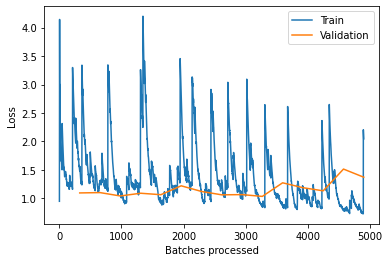

In [0]:
# Plotting The losses for training and validation
learn.recorder.plot_losses()

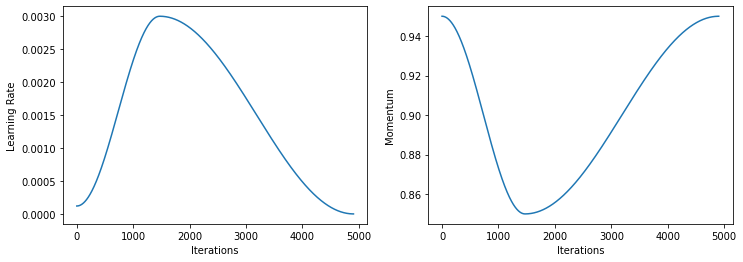

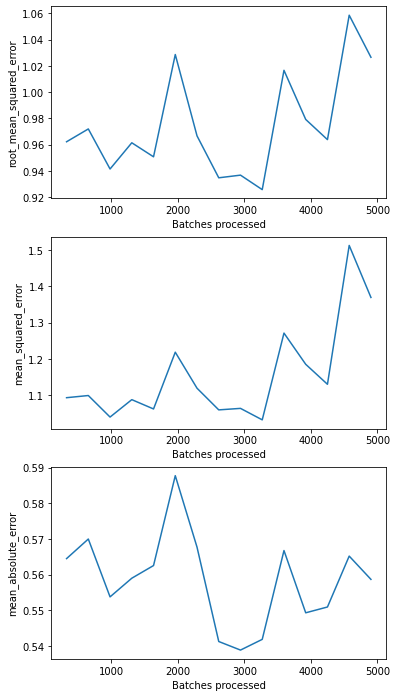

In [0]:
#Plotting Momentum & Learning Rate
learn.recorder.plot_lr(show_moms=True)
#Plotting the metrics of evaluation
learn.recorder.plot_metrics()

In [0]:
#Predicting For The Complete Test set
test_predictions = learn.get_preds(ds_type=DatasetType.Test)[0]
#Converting the tensor output to a list of predicted values
test_predictions = [i[0] for i in test_predictions.tolist()]
#Converting the prediction to . a dataframe
test_predictions = pd.DataFrame(test_predictions, columns = ['target'])
#Writing the predictions to an excel file.
#predictions.to_excel("Fast_ai_solution.xlsx", index = False)

https://analyticsindiamag.com/a-hands-on-guide-to-regression-with-fast-ai/

https://medium.com/analytics-vidhya/neural-networks-for-tabular-data-touching-the-untouched-efd66c950463

https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai

### Test Model (recursive approach)

In [0]:
test_data_inflation.head()

,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-2.096000e-01,0.309700,0.493000,-0.092200,0.181600,0.280100,0.315300,0.585100,0.962600,1.399000,1.232800,-0.167000


In [0]:
train_data_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,-0.303337,0.405680,0.303030,1.208459,-0.597015,-0.200200,-0.200602,0.000000,0.402010,0.500501,0.099602,-0.398010,0.000000,0.499500,0.497018,1.582591,-0.486855,-0.195695,-0.392157,-0.196850,0.197239,0.098425,0.688299,-0.097656,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.618413,0.623269,2.360000,1.651036,0.826526,0.896006,0.651866,0.722733,0.214332,0.223173,1.326777,0.833257,0.481293,1.201988,1.860000,2.905949,0.829994,0.709622,0.488538,0.392670,0.353883,-0.148478,0.669145,0.803176,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.700000,0.500000,0.600000,0.110000,0.800000,0.690000,0.310000,0.077581,0.100000,0.500000,0.400000,0.457796,0.600000,0.400000,1.400000,0.494753,0.200000,0.414642,0.200000,0.300000,0.600000,0.800000,0.400000,0.200000,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,0.094046,0.532286,0.179856,3.992646,0.923362,-0.211996,-0.573771,-1.140382,-0.727607,-0.112804,0.299207,0.137869,0.389447,4.353287,5.799241,0.444696,0.411886,0.189708,-0.121102,-0.465617,-0.291006,0.521861,2.269735,1.343014,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.85

#### Take only Armenian values

In [0]:
train_df_armenia = train_data_inflation[train_data_inflation.index.str.contains('Armenia')]
test_df_armenia = test_data_inflation[test_data_inflation.index.str.contains('Armenia')]
#df_armenia.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)
current_gdp_armenia = new_df_current_us_gdp[new_df_current_us_gdp.index.str.contains('Armenia')]
constant_gdp_armenia = new_df_constant_gdp[new_df_constant_gdp.index.str.contains('Armenia')]

In [0]:
current_gdp_armenia

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Armenia,1.845482e+09,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,3.576615e+09,4.900470e+09,6.384452e+09,9.206302e+09,1.166204e+10,8.647937e+09,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.152746e+10,1.243309e+10,7.082519e+11


In [0]:
constant_gdp_armenia

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Armenia,1317.739791,1404.32009,1548.059613,1761.841234,2019.900532,2244.139398,2571.977128,2934.024882,3366.664939,3629.909091,3137.346098,3218.372707,3370.551103,3603.595848,3705.357396,3819.217787,3923.716502,3917.379676,4198.794749,4406.706434,9912.789467


### Testing ALL Models

In [0]:
def predict_value(conc, model):
  if model == 'lgb':
    return gbm.predict(np.array(conc).reshape(1, (len(conc))), num_iteration=gbm.best_iteration)
  if model == 'cgb':
    return cb_model.predict(conc)
  if model == 'xgb':
    return xgb_model.predict(conc)
  if model == 'nn':
    conc[12] = calendar.month_name[conc[12]]
    df_test = pd.DataFrame([conc], columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'month', 'current us gdp', 'constant us gdp'])
    return learn.predict(df_test.iloc[0])[1].numpy()[0]
  if model == 'rf':
    return RForest.predict(np.array(conc).reshape(1, -1))
  if model == 'tuned1':
    return rf_random.predict(np.array(conc).reshape(1, -1))
  # if model == 'tuned2':
  #   return rf_random_2.best_estimator_.predict(np.array(conc).reshape(1, -1))

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
def calculate_model_result(model):

  df_errors = {'MSE': {}, 'MAE': {}, 'RMSE': {}}

  df_predicted_values = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6:[]}
  df_test_values = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6:[]}

  len_train_df = len(train_df_armenia.columns)

  for i in range(len(test_df_armenia.columns)-6):
    
    true_values = np.array([])
    predicted_values = np.array([])

    for j in range(7):
      if i + j <= 12:
        if i + j < 12:
          arr1 = train_df_armenia[train_df_armenia.columns[-(12-i-j):]].values[0]
        else:
          arr1 = np.array([])
        arr2 = test_df_armenia[test_df_armenia.columns[:i]].values[0]
        if j > 0:
          arr3 = predicted_values[-j:]
        else:
          arr3 = np.array([])

        conc = np.concatenate((arr1, arr2, arr3), axis=0)
      else:
        arr2 = test_df_armenia[test_df_armenia.columns[i - (12 - j):i]].values[0]
        if j > 0:
          arr3 = predicted_values[-j:]
        else:
          arr3 = np.array([])

        conc = np.concatenate((arr2, arr3), axis=0)

      month_col = test_df_armenia.columns[i+j]
      str_month = int(month_col[month_col.find('M') + 1:]) # calendar.month_name[]
      year = month_col[:month_col.find('M')]
      l = [str_month, current_gdp_armenia[str(int(year)-1)].values[0], constant_gdp_armenia[str(int(year)-1)].values[0]]
      conc = conc.tolist() + l
      y_pred = predict_value(conc, model)

      # shadow
      df_predicted_values[j].append(y_pred)
      df_test_values[j].append(test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      # true_values = np.append(true_values, test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      predicted_values = np.append(predicted_values, y_pred)

  for key in df_predicted_values.keys():
    df_errors['MSE'][key] = mean_squared_error(df_test_values[key], df_predicted_values[key])
    df_errors['MAE'][key] = mean_absolute_error(df_test_values[key], df_predicted_values[key])
    df_errors['RMSE'][key] = np.sqrt(mean_squared_error(df_test_values[key], df_predicted_values[key]))
  
  return df_errors

In [0]:
from statistics import mean
model_list = ['nn', 'rf', 'tuned1', 'lgb', 'cgb', 'xgb']
res_ = {}
for model in model_list:
  df_errors = calculate_model_result(model)
  res_[model] = df_errors

In [0]:
model_list = ['lgb', 'cgb', 'xgb', 'nn', 'rf', 'tuned1']
for model in model_list:
  for k in range(1, 7):
    print(k, model, res_[model]['MSE'][k], res_[model]['RMSE'][k], res_[model]['MAE'][k])

1 lgb 0.6024458362032484 0.7761738440602391 0.5963310126060625
2 lgb 0.5566263250139121 0.7460739407149348 0.5624737606438732
3 lgb 0.5203388751993236 0.7213451844986031 0.5425492147495209
4 lgb 0.46596579610045974 0.6826168735831687 0.5042356742988923
5 lgb 0.4641042377784434 0.6812519635042849 0.5091353031376008
6 lgb 0.45592720858731806 0.6752238211047638 0.49986971641500383
1 cgb 0.6773107991758778 0.8229889423168927 0.6434213904897048
2 cgb 0.644237438530434 0.8026440297731205 0.6062387181380688
3 cgb 0.5813223159734237 0.7624449593075054 0.5651759683433445
4 cgb 0.508363190092573 0.7129959257194763 0.5280738949180793
5 cgb 0.5170644212428344 0.7190719166000258 0.534879701264771
6 cgb 0.5327257587533258 0.7298806469234034 0.5479705445389962
1 xgb 0.9704216898463434 0.9850998375019373 0.7689705400645759
2 xgb 0.9205940394249524 0.9594759191480277 0.7324416589058944
3 xgb 0.8384509229351189 0.915669658192909 0.6821751120504425
4 xgb 0.6997952141544561 0.8365376346312556 0.6181357589

In [0]:
model_list = ['lgb', 'cgb', 'xgb', 'nn', 'rf', 'tuned1']
for model in model_list:
  # for key in res_[model].keys():
  for k in range(1, 7):
    print(k, model, res_[model]['MSE'][k], res_[model]['RMSE'][k], res_[model]['MAE'][k])

1 lgb 0.6024458362032484 0.7761738440602391 0.5963310126060625
2 lgb 0.5566263250139121 0.7460739407149348 0.5624737606438732
3 lgb 0.5203388751993236 0.7213451844986031 0.5425492147495209
4 lgb 0.46596579610045974 0.6826168735831687 0.5042356742988923
5 lgb 0.4641042377784434 0.6812519635042849 0.5091353031376008
6 lgb 0.45592720858731806 0.6752238211047638 0.49986971641500383
1 cgb 0.6773107991758778 0.8229889423168927 0.6434213904897048
2 cgb 0.644237438530434 0.8026440297731205 0.6062387181380688
3 cgb 0.5813223159734237 0.7624449593075054 0.5651759683433445
4 cgb 0.508363190092573 0.7129959257194763 0.5280738949180793
5 cgb 0.5170644212428344 0.7190719166000258 0.534879701264771
6 cgb 0.5327257587533258 0.7298806469234034 0.5479705445389962
1 xgb 0.9704216898463434 0.9850998375019373 0.7689705400645759
2 xgb 0.9205940394249524 0.9594759191480277 0.7324416589058944
3 xgb 0.8384509229351189 0.915669658192909 0.6821751120504425
4 xgb 0.6997952141544561 0.8365376346312556 0.6181357589

#### Test all cases

In [0]:
def claculate_new_country(country_name):
  if country_name != 'China':
    train_df_armenia = train_data_inflation[train_data_inflation.index.str.contains(country_name)]
    test_df_armenia = test_data_inflation[test_data_inflation.index.str.contains(country_name)]
  else:
    train_df_armenia = train_data_inflation[train_data_inflation.index.str.contains('Mainland')]
    test_df_armenia = test_data_inflation[test_data_inflation.index.str.contains('Mainland')]

  # !pip3 install pyramid-arima
  from pyramid.arima import auto_arima
  arima_model = auto_arima(train_df_armenia.values[0], trace=True, error_action='ignore', suppress_warnings=True)
  arima_model.fit(train_df_armenia.values[0])

  arima_model_predicted = arima_model.predict(n_periods=len(test_df_armenia.values[0]))

  rms = sqrt(mean_squared_error(test_df_armenia.values[0], arima_model_predicted))
  print('RMSE:', rms)
  mse = mean_squared_error(test_df_armenia.values[0], arima_model_predicted)
  print('MSE:', mse)
  mae = mean_absolute_error(test_df_armenia.values[0], arima_model_predicted)
  print('MAE:', mae)
  #df_armenia.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)
  current_gdp_armenia = new_df_current_us_gdp[new_df_current_us_gdp.index.str.contains(country_name)]
  constant_gdp_armenia = new_df_constant_gdp[new_df_constant_gdp.index.str.contains(country_name)]
  from statistics import mean
  model_list = ['lgb', 'cgb', 'xgb', 'nn', 'rf', 'tuned1']
  res_ = {}
  for model in model_list:
    df_errors = calculate_model_result(model, train_df_armenia, test_df_armenia, current_gdp_armenia, constant_gdp_armenia)
    res_[model] = df_errors
  model_list = ['lgb', 'cgb', 'xgb', 'nn', 'rf', 'tuned1']
  for model in model_list:
    for k in range(1, 7):
      print(k, model, res_[model]['MSE'][k], res_[model]['RMSE'][k], res_[model]['MAE'][k])
  df_errors = calculate_arima(arima_model, train_df_armenia, test_df_armenia)
  for key in df_errors.keys():
    print('arima', key, df_errors[key])
  df_errors_rw = calculate_random_walk(train_df_armenia, test_df_armenia)
  for key in df_errors_rw.keys():
    print('random walk', key, df_errors_rw[key])

In [0]:
def calculate_model_result(model, train_df_armenia, test_df_armenia, current_gdp_armenia, constant_gdp_armenia):

  df_errors = {'MSE': {}, 'MAE': {}, 'RMSE': {}}

  df_predicted_values = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6:[]}
  df_test_values = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6:[]}

  len_train_df = len(train_df_armenia.columns)

  for i in range(len(test_df_armenia.columns)-6):
    
    true_values = np.array([])
    predicted_values = np.array([])

    for j in range(7):
      if i + j <= 12:
        if i + j < 12:
          arr1 = train_df_armenia[train_df_armenia.columns[-(12-i-j):]].values[0]
        else:
          arr1 = np.array([])
        arr2 = test_df_armenia[test_df_armenia.columns[:i]].values[0]
        if j > 0:
          arr3 = predicted_values[-j:]
        else:
          arr3 = np.array([])

        conc = np.concatenate((arr1, arr2, arr3), axis=0)
      else:
        arr2 = test_df_armenia[test_df_armenia.columns[i - (12 - j):i]].values[0]
        if j > 0:
          arr3 = predicted_values[-j:]
        else:
          arr3 = np.array([])

        conc = np.concatenate((arr2, arr3), axis=0)

      month_col = test_df_armenia.columns[i+j]
      str_month = int(month_col[month_col.find('M') + 1:]) # calendar.month_name[]
      year = month_col[:month_col.find('M')]
      l = [str_month, current_gdp_armenia[str(int(year)-1)].values[0], constant_gdp_armenia[str(int(year)-1)].values[0]]
      conc = conc.tolist() + l
      y_pred = predict_value(conc, model)

      # shadow
      df_predicted_values[j].append(y_pred)
      df_test_values[j].append(test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      # true_values = np.append(true_values, test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      predicted_values = np.append(predicted_values, y_pred)

  for key in df_predicted_values.keys():
    df_errors['MSE'][key] = mean_squared_error(df_test_values[key], df_predicted_values[key])
    df_errors['MAE'][key] = mean_absolute_error(df_test_values[key], df_predicted_values[key])
    df_errors['RMSE'][key] = np.sqrt(mean_squared_error(df_test_values[key], df_predicted_values[key]))
    #print('mae vs rmse', df_errors['MAE'][key], df_errors['RMSE'][key])
  
  return df_errors

In [0]:
def calculate_arima(arima_model, train_df_armenia, test_df_armenia):

  df_errors = {'MSE': {}, 'MAE': {}, 'RMSE': {}}
  len_train_df = len(train_df_armenia.columns)

  df_predicted_values = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
  df_test_values = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}

  for i in range(len(test_df_armenia.columns)-6):
    arr1 = train_df_armenia[train_df_armenia.columns[-(len_train_df-i):]].values[0]
    arr2 = test_df_armenia[test_df_armenia.columns[:i]].values[0]

    conc = np.concatenate((arr1, arr2), axis=0)
    arima_model.fit(conc)
    y_pred = arima_model.predict(n_periods=6)

    for key in range(1, 7):
      df_predicted_values[key].append(y_pred[key - 1])
      df_test_values[key].append(test_df_armenia.values[0][i + key])

  for key in df_predicted_values.keys():
    df_errors['MSE'][key] = mean_squared_error(df_test_values[key], df_predicted_values[key])
    df_errors['MAE'][key] = mean_absolute_error(df_test_values[key], df_predicted_values[key])
    df_errors['RMSE'][key] = np.sqrt(mean_squared_error(df_test_values[key], df_predicted_values[key]))

  return df_errors

In [0]:
def calculate_random_walk(train_df_armenia, test_df_armenia):

  df_errors = {'MSE': {}, 'MAE': {}, 'RMSE': {}}
  len_train_df = len(train_df_armenia.columns)

  df_predicted_values = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
  df_test_values = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}

  for i in range(len(test_df_armenia.columns)-6):
    arr1 = train_df_armenia[train_df_armenia.columns[-(len_train_df-i):]].values[0]
    arr2 = test_df_armenia[test_df_armenia.columns[:i]].values[0]

    conc = np.concatenate((arr1, arr2), axis=0)
    y_pred = conc[-1]

    for key in range(1, 7):
      df_predicted_values[key].append(y_pred)
      df_test_values[key].append(test_df_armenia.values[0][i + key])

  for key in df_predicted_values.keys():
    df_errors['MSE'][key] = mean_squared_error(df_test_values[key], df_predicted_values[key])
    df_errors['MAE'][key] = mean_absolute_error(df_test_values[key], df_predicted_values[key])
    df_errors['RMSE'][key] = np.sqrt(mean_squared_error(df_test_values[key], df_predicted_values[key]))

  return df_errors

In [0]:
claculate_new_country('Luxembourg')

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=373.431, BIC=393.738, Fit time=0.500 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=452.563, BIC=459.332, Fit time=0.039 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=424.209, BIC=434.362, Fit time=0.049 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=412.111, BIC=422.264, Fit time=0.059 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=414.548, BIC=431.470, Fit time=0.365 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=393.775, BIC=417.466, Fit time=0.967 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=414.534, BIC=431.456, Fit time=0.137 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=363.183, BIC=386.874, Fit time=0.333 seconds
Fit ARIMA: order=(3, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=371.362, BIC=401.822, Fit time=0.828 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 1);

In [0]:
claculate_new_country('Armenia')

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=779.928, BIC=800.235, Fit time=0.388 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=841.750, BIC=848.519, Fit time=0.012 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=804.015, BIC=814.169, Fit time=0.033 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=793.804, BIC=803.957, Fit time=0.050 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=797.695, BIC=814.617, Fit time=0.173 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=778.784, BIC=802.475, Fit time=0.276 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=797.028, BIC=817.335, Fit time=0.288 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=736.920, BIC=763.996, Fit time=0.761 seconds
Fit ARIMA: order=(4, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=743.346, BIC=777.191, Fit time=0.905 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1);

In [0]:
claculate_new_country('Belarus')

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=749.091, BIC=769.370, Fit time=0.187 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=761.054, BIC=767.814, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=761.373, BIC=771.512, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=759.344, BIC=769.483, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=748.963, BIC=765.862, Fit time=0.121 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=751.312, BIC=764.831, Fit time=0.134 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=744.935, BIC=765.214, Fit time=0.498 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=746.963, BIC=760.483, Fit time=0.064 seconds
Fit ARIMA: order=(2, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=749.373, BIC=776.412, Fit time=0.537 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 1);

In [0]:
claculate_new_country('Tajikistan')

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=686.952, BIC=707.231, Fit time=0.385 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=734.392, BIC=741.151, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=728.529, BIC=738.668, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=720.139, BIC=730.279, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=686.614, BIC=703.514, Fit time=0.450 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=685.243, BIC=698.762, Fit time=0.209 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=686.615, BIC=703.515, Fit time=0.530 seconds
Total fit time: 1.674 seconds
RMSE: 0.3419711620763317
MSE: 0.11694427569183674
MAE: 0.2983239783486346
1 lgb 0.121228792206154 0.3481792529806364 0.28230561250545594
2 lgb 0.10335040222831039 0.3214815736995052 0.25644213409001804
3 lgb 0.09629452618904338 0.31031

In [0]:
claculate_new_country('Vietnam')

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=451.283, BIC=471.590, Fit time=0.218 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=532.728, BIC=539.497, Fit time=0.040 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=452.006, BIC=462.159, Fit time=0.044 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=477.311, BIC=487.465, Fit time=0.047 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=450.026, BIC=466.949, Fit time=0.124 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=448.073, BIC=461.611, Fit time=0.094 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=450.044, BIC=466.966, Fit time=0.167 seconds
Total fit time: 0.738 seconds
RMSE: 0.5161155484573651
MSE: 0.2663752593594468
MAE: 0.42335088081718736
1 lgb 0.1586649391888764 0.39832767816067766 0.3373204411453671
2 lgb 0.14716976286283945 0.3836271143478253 0.31740913220874756
3 lgb 0.16425294420289405 0.4052

In [0]:
claculate_new_country('Niger')

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=773.385, BIC=793.692, Fit time=0.493 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=771.975, BIC=778.744, Fit time=0.012 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=769.203, BIC=779.357, Fit time=0.035 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=769.099, BIC=779.253, Fit time=0.039 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=771.097, BIC=784.635, Fit time=0.079 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=771.096, BIC=784.634, Fit time=0.060 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=773.096, BIC=790.018, Fit time=0.070 seconds
Total fit time: 0.791 seconds
RMSE: 0.2496973641060342
MSE: 0.062348773641501404
MAE: 0.18112283478192173
1 lgb 0.0339623874057042 0.1842888694569051 0.14339179077154782
2 lgb 0.028655568349972713 0.16927955679872486 0.1333772320856724
3 lgb 0.023980156950348084 0.

In [0]:
claculate_new_country('China')

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=411.570, BIC=431.877, Fit time=0.331 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=420.133, BIC=426.902, Fit time=0.051 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=407.146, BIC=417.299, Fit time=0.046 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=405.912, BIC=416.065, Fit time=0.048 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=407.848, BIC=421.386, Fit time=0.089 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=407.798, BIC=421.336, Fit time=0.060 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=409.521, BIC=426.444, Fit time=0.400 seconds
Total fit time: 1.030 seconds
RMSE: 0.5652603798471746
MSE: 0.3195192970249721
MAE: 0.4275214594672237
1 lgb 0.09891056572934954 0.3145005019540502 0.2613299756347367
2 lgb 0.11418337642403142 0.3379103082535829 0.2744251301001926
3 lgb 0.10522948388088442 0.324390